In [1]:
import os
import pandas as pd
import numpy as np
import datetime as datetime
import matplotlib.pyplot as plt

In [2]:
# Setup working directory and relative filepaths
current_dir = os.curdir
data_dir = os.path.join(current_dir, "data")
output_dir = os.path.join(current_dir, "data_clean")

# Get data path
abc_data_dir = os.path.join(data_dir, "abc-news.csv")
bbc_data_dir = os.path.join(data_dir, "bbc-news.csv")
cbs_data_dir = os.path.join(data_dir, "cbs-news.csv")
cnn_data_dir = os.path.join(data_dir, "cnn-news.csv")

# Read csv data
abc_data_csv = pd.read_csv(abc_data_dir, encoding="utf-16")
bbc_data_csv = pd.read_csv(bbc_data_dir, encoding="utf-16")
cbs_data_csv = pd.read_csv(cbs_data_dir, encoding="utf-16")
cnn_data_csv = pd.read_csv(cnn_data_dir, encoding="utf-16")

In [3]:
abc_data_df = pd.DataFrame(abc_data_csv.copy())
bbc_data_df = pd.DataFrame(bbc_data_csv.copy())
cbs_data_df = pd.DataFrame(cbs_data_csv.copy())
cnn_data_df = pd.DataFrame(cnn_data_csv.copy())

In [4]:
print("abc: " + str(len(abc_data_df)))
print("bbc: " + str(len(bbc_data_df)))
print("cbs: " + str(len(cbs_data_df)))
print("cnn: " + str(len(cnn_data_df)))

abc: 43280
bbc: 21119
cbs: 35085
cnn: 31696


In [5]:
# Remove columns from Dataframe
col_ls = ['id', 'page_id', 'name', 'message', 'description', 'caption', 'picture']
abc_data_df.drop(columns = col_ls, inplace = True)
bbc_data_df.drop(columns = col_ls, inplace = True)
cbs_data_df.drop(columns = col_ls, inplace = True)
cnn_data_df.drop(columns = col_ls, inplace = True)

In [6]:
# Determine how many post_types and status_types and factorize types
post_types_unique = pd.unique(abc_data_df['post_type'])
post_types_factorize = pd.factorize(post_types_unique, sort=True)[0]
status_types_unique = pd.unique(abc_data_df['status_type'])
status_types_unique = [i for i in status_types_unique if str(i) != 'nan']
status_types_factorize = pd.factorize(status_types_unique, sort=True)[0]

In [7]:
# Create dictionary for post_types and status_types
post_types_dict = dict(zip(post_types_unique, post_types_factorize))
status_types_dict = dict(zip(status_types_unique, status_types_factorize))

In [8]:
# Define function to assign kv pairs to post_types and status_types
def post_cat(x):
    for type, category in post_types_dict.items():
        if x in type:
            return category

def status_cat(x):
    for type, category in status_types_dict.items():
        try:
            if x in type:
                return category
        except TypeError:
            return -1

# Apply function to DataFrame
abc_data_df['post_category'] = abc_data_df['post_type'].apply(post_cat)
abc_data_df['status_category'] = abc_data_df['status_type'].apply(status_cat)

In [9]:
# Calculate total reacts
react_col = ['likes_count', 'comments_count', 'shares_count', 'love_count',
            'wow_count', 'haha_count', 'sad_count', 'thankful_count', 'angry_count',]

abc_data_df['total_reacts'] = abc_data_df[react_col].sum(axis=1)

# Transform 'posted_at' to datetime.datime object
abc_data_df['posted_at'] = pd.to_datetime(abc_data_df['posted_at'])

# Round datetime.datetime object to the nearest hour recursively using round_hour method
def round_hour(t):
    t_start_hr = t.replace(minute=0, second=0, microsecond=0) # round to down to nearest hour
    t = t_start_hr
    return t

abc_data_df['posted_at'] = abc_data_df['posted_at'].apply(round_hour)

# Store date and time in new columns using list comprehension 
abc_data_df['date_posted'] = [i.date() for i in abc_data_df['posted_at']]
abc_data_df['time_posted'] = [i.time() for i in abc_data_df['posted_at']]
abc_data_df.drop(columns=['posted_at'], inplace=True)

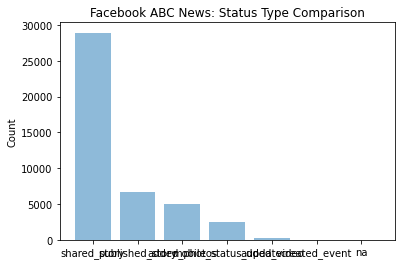

In [10]:
objects = status_types_unique
objects.append('na')
y_pos = np.arange(len(objects))
performance = abc_data_df['status_category'].value_counts()
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Count')
plt.title('Facebook ABC News: Status Type Comparison')
plt.show()

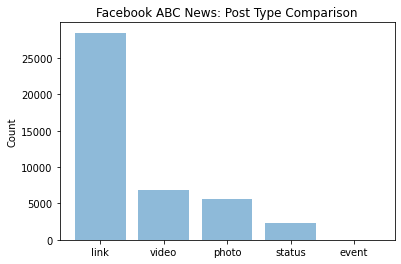

In [11]:
objects = post_types_unique
y_pos = np.arange(len(objects))
performance = abc_data_df['post_category'].value_counts()
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Count')
plt.title('Facebook ABC News: Post Type Comparison')
plt.show()

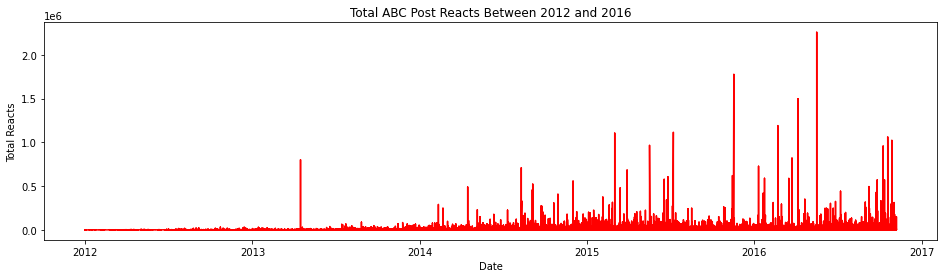

In [12]:
# Total reacts over time
time_reacts = pd.Series(data=abc_data_df['total_reacts'].values, index=abc_data_df['date_posted'])
time_reacts.plot(figsize=(16,4), color='r')
plt.ylabel('Total Reacts')
plt.xlabel('Date')
plt.title('Total ABC Post Reacts Between 2012 and 2016')
plt.show()
